In [41]:
# Initial Imports
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

In [42]:
# Set the random seed for reproducibility
# Note: This is used for model prototyping, but it is good practice to comment this out and run multiple experiments to evaluate your model.
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [66]:
# Loaded in GDP data
df = pd.read_csv(
    Path("GDPproject2.csv")
)

df = df[(df["Subject Descriptor"]=="Gross domestic product, current prices") & (df["Units"]=="U.S. dollars")]
df.drop(columns=["Subject Descriptor", "Units", "Scale", "Estimates Start After"], inplace=True)
df = df.T
df.columns = df.loc["Country"]
df = df.drop("Country", axis=0)
df.head()

Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1980,NaN,1.946,42.346,6.639,0.131,233.696,NaN,NaN,162.628,80.923,...,"2,857.33",12.165,NaN,0.121,69.841,35.357,NaN,NaN,4.246,NaN
1981,NaN,2.229,44.372,6.214,0.148,189.802,NaN,NaN,188.067,70.121,...,"3,207.03",13.578,NaN,0.114,78.367,17.617,NaN,NaN,4.385,NaN
1982,NaN,2.296,44.78,6.214,0.164,94.25,NaN,NaN,186.709,70.111,...,"3,343.80",11.1,NaN,0.114,79.998,23.369,NaN,NaN,4.232,NaN
1983,NaN,2.319,47.529,6.476,0.182,116.267,NaN,NaN,179.151,71.032,...,"3,634.03",6.093,NaN,0.117,79.672,35.204,NaN,NaN,3.653,NaN
1984,NaN,2.29,51.513,6.864,0.208,130.544,NaN,NaN,196.777,67.007,...,"4,037.65",5.794,NaN,0.144,57.826,61.171,NaN,NaN,3.003,NaN


In [68]:
# Top 5 Largest Economies United States, China, Japan, Germany, India
GDP5 = df[['United States', 'China', 'Japan', 'Germany', 'India']]
GDP5

Country,United States,China,Japan,Germany,India
1980,"2,857.33",303.027,"1,127.88",853.705,189.438
1981,"3,207.03",288.734,"1,243.79",718.264,196.535
1982,"3,343.80",284.608,"1,157.60",693.547,203.537
1983,"3,634.03",305.426,"1,268.62",691.912,222.049
1984,"4,037.65",314.224,"1,345.20",651.9,215.556
1985,"4,339.00",310.151,"1,427.35",661.037,237.618
1986,"4,579.63",300.924,"2,121.25",944.124,252.751
1987,"4,855.25",327.719,"2,584.34","1,174.86",283.75
1988,"5,236.43",408.652,"3,134.18","1,266.62",299.645
1989,"5,641.60",458.167,"3,117.07","1,257.39",301.234


In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [50]:
# read in data
df = pd.read_csv('WEOApr2021all.csv')
df = df[
    (df["Units"] == "U.S. dollars") | (df["Units"] == "Percent change") | (df["Units"] == "Percent of GDP") | (df["Units"] == "Persons") | (df["Units"] == "Percent of total labor force")]
df.drop(columns=['WEO Country Code','ISO','WEO Subject Code','Subject Notes','Units','Country/Series-specific Notes','Estimates Start After','Scale'], inplace=True)
df = df.T
df.columns = [df.loc["Country"], df.loc['Subject Descriptor']]
df.drop(['Country','Subject Descriptor'],axis=0,inplace=True)
US_df = df['United States']
china_df =df['China']
japan_df = df['Japan']
india_df = df['India']
germany_df = df['Germany']
# clean numeric data
US_df.dropna(axis=1, inplace=True)
US_df = US_df.replace(',','', regex=True)
US_df = US_df.astype("float")
china_df.dropna(axis=1, inplace=True)
china_df = china_df.replace(',','', regex=True)
china_df = china_df.astype("float")
japan_df.dropna(axis=1, inplace=True)
japan_df = japan_df.replace(',','', regex=True)
japan_df = japan_df.astype("float")
india_df.dropna(axis=1, inplace=True)
india_df = india_df.replace(',','', regex=True)
india_df = india_df.astype("float")
germany_df.dropna(axis=1, inplace=True)
germany_df = germany_df.replace(',','', regex=True)
germany_df = germany_df.astype("float")

<ipython-input-50-997481eb5939>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_df.dropna(axis=1, inplace=True)
<ipython-input-50-997481eb5939>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_df.dropna(axis=1, inplace=True)
<ipython-input-50-997481eb5939>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  japan_df.dropna(axis=1, inplace=True)
<ipython-input-50-997481eb5939>:24: SettingWithCopyWarning: 
A value is trying to 

In [51]:
# create x and y for each country
US_X = US_df.drop(columns=["Gross domestic product, current prices"])
US_y = US_df['Gross domestic product, current prices']
china_X = china_df.drop(columns=["Gross domestic product, current prices"])
china_y = china_df['Gross domestic product, current prices']
japan_X = japan_df.drop(columns=["Gross domestic product, current prices"])
japan_y = japan_df['Gross domestic product, current prices']
india_X = india_df.drop(columns=["Gross domestic product, current prices"])
india_y = india_df['Gross domestic product, current prices']
germany_X = germany_df.drop(columns=["Gross domestic product, current prices"])
germany_y = germany_df['Gross domestic product, current prices']




In [9]:
# train-test-splits for each country
#US_X_train, US_X_test, US_y_train, US_y_test = train_test_split(US_X,US_y, shuffle=False, test_size=0.3)
#china_X_train, china_X_test, china_y_train, china_y_test = train_test_split(china_X,china_y)
#japan_X_train, japan_X_test, japan_y_train, japan_y_test = train_test_split(japan_X,japan_y)
#india_X_train, india_X_test, india_y_train, india_y_test = train_test_split(india_X,india_y)
#germany_X_train, germany_X_test, germany_y_train, germany_y_test = train_test_split(germany_X,germany_y)

#set time for train set

In [10]:

# create models for each country
US_model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=0)
US_model.fit(US_X_train, US_y_train)
china_model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=0)
china_model.fit(china_X_train, china_y_train)
japan_model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=0)
japan_model.fit(japan_X_train, japan_y_train)
india_model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=0)
india_model.fit(india_X_train, india_y_train)
germany_model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=0)
germany_model.fit(germany_X_train, germany_y_train)

RandomForestRegressor(max_depth=3, random_state=0)

In [13]:
US_GDP_preds = US_model.predict(US_X_test)
US_GDP_preds

array([ 7659.25249754,  9076.14176171, 16742.42737635, 15098.98425206,
       25469.72808349, 10769.88282135,  6898.44509548,  9027.88697679,
       14896.73137651,  4255.23200626,  5927.46891261, 20049.07154188])

In [14]:
US_X_test

Subject Descriptor,"Gross domestic product, constant prices","Gross domestic product per capita, current prices",Total investment,Gross national savings,"Inflation, average consumer prices","Inflation, end of period consumer prices",Volume of imports of goods and services,Volume of Imports of goods,Volume of exports of goods and services,Volume of exports of goods,Unemployment rate,Population,Current account balance,Current account balance
1995,2.684,28671.48,21.273,18.669,2.805,2.705,8.006,9.007,10.279,11.650,5.592,266.458,-113.571,-1.487
2000,4.127,36317.74,23.675,20.768,3.367,3.427,12.885,12.961,8.343,9.927,3.967,282.296,-401.917,-3.920
2012,2.249,51563.13,20.021,18.777,2.073,1.822,2.706,2.625,3.407,3.842,8.075,314.121,-418.115,-2.581
2011,1.551,49829.06,19.104,16.498,3.140,3.086,5.635,6.143,7.140,7.054,8.933,311.918,-455.302,-2.929
2024,1.481,76362.22,21.301,18.819,2.483,2.434,2.565,1.651,3.666,2.696,3.469,337.734,-577.191,-2.238
2004,3.799,41629.86,22.659,17.755,2.668,3.209,11.399,11.440,9.666,8.762,5.542,293.389,-635.891,-5.206
1993,2.753,26364.19,20.394,16.963,2.970,2.654,8.646,10.005,3.276,3.251,6.908,260.146,-84.816,-1.237
1999,4.753,34494.54,23.420,20.874,2.193,2.939,11.299,12.874,4.984,4.177,4.217,279.195,-286.609,-2.976
2006,2.855,46213.51,23.539,19.250,3.222,2.199,6.631,6.236,9.342,9.915,4.608,298.930,-816.647,-5.911
1980,-0.257,12552.94,23.310,22.053,13.502,11.887,-6.660,-7.449,10.777,12.292,7.175,227.622,2.316,0.081


In [15]:
US_y_test

1995     7639.75
2000    10252.35
2012    16197.05
2011    15542.60
2024    25790.12
2004    12213.73
1993     6858.55
1999     9630.70
2006    13814.60
1980     2857.33
1986     4579.63
2017    19542.98
Name: Gross domestic product, current prices, dtype: float64

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Calculating the confusion matrix
r2 = r2_score(US_y_test, US_GDP_preds)
r2

0.9796553667788231

In [23]:
mse = mean_squared_error(US_y_test, US_GDP_preds)
mse

802361.2595833958

In [24]:
rmse = np.sqrt(mse)
rmse

895.7462026620017

In [27]:
importances = US_model.feature_importances_
sorted(zip(US_model.feature_importances_, US_X.columns), reverse=True)

[(0.5199434122664838, 'Population'),
 (0.3982987528114338, 'Gross domestic product per capita, current prices'),
 (0.023335495267709856, 'Current account balance'),
 (0.016391799662494135, 'Inflation, end of period consumer prices'),
 (0.01127727058271665, 'Inflation, average consumer prices'),
 (0.007302823266041531, 'Unemployment rate'),
 (0.006425331354181817, 'Total investment'),
 (0.004953914477425963, 'Gross national savings'),
 (0.004761433155852938, 'Current account balance'),
 (0.0020126727990727126, 'Volume of exports of goods and services'),
 (0.0016085646330424345, 'Volume of exports of goods'),
 (0.001582817332791403, 'Volume of Imports of goods'),
 (0.0011141347532704644, 'Volume of imports of goods and services'),
 (0.0009915776374826368, 'Gross domestic product, constant prices')]

In [28]:
US_model.score(US_X_train, US_y_train)

0.9950558005703847

In [29]:
US_model.score(US_X_test, US_y_test)

0.9796553667788231

<AxesSubplot:>

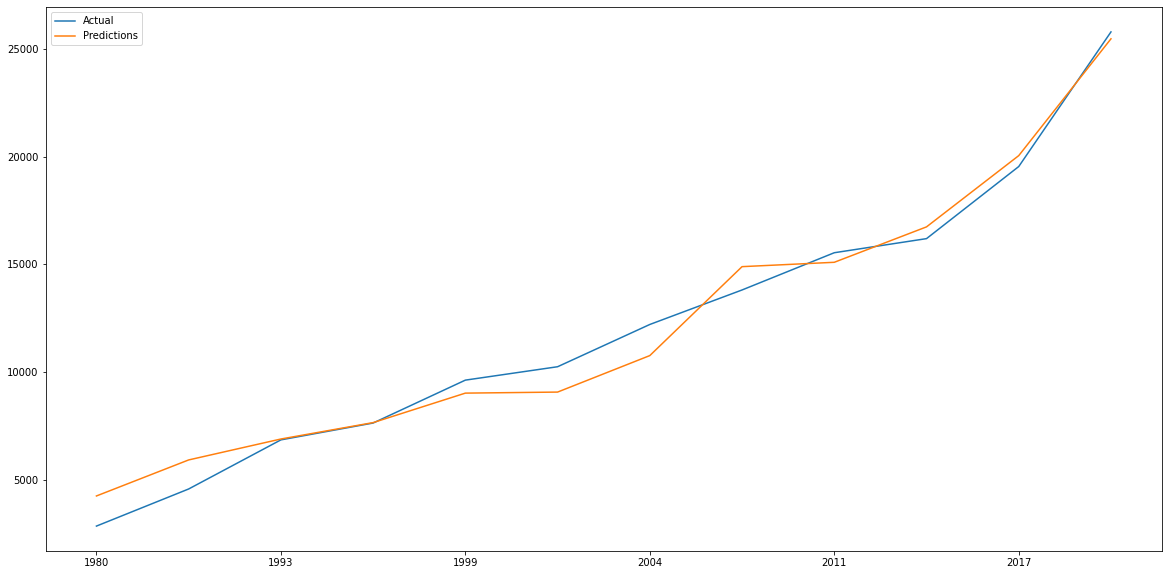

In [38]:
US_pred_results = US_X_test.index.to_frame()
US_pred_results["Actual"] = US_y_test
US_pred_results["Predictions"] = US_GDP_preds
US_pred_results.sort_index(inplace=True)
US_pred_results.plot(figsize=(20,10))


In [91]:
US_df.head()

Subject Descriptor,"Gross domestic product, constant prices","Gross domestic product, current prices","Gross domestic product per capita, current prices",Total investment,Gross national savings,"Inflation, average consumer prices","Inflation, end of period consumer prices",Volume of imports of goods and services,Volume of Imports of goods,Volume of exports of goods and services,Volume of exports of goods,Unemployment rate,Population,Current account balance,Current account balance
1980,-0.257,2857.33,12552.94,23.310,22.053,13.502,11.887,-6.660,-7.449,10.777,12.292,7.175,227.622,2.316,0.081
1981,2.538,3207.03,13948.70,24.277,23.195,10.378,8.569,2.610,2.041,1.219,-0.655,7.617,229.916,5.031,0.157
1982,-1.802,3343.80,14404.99,22.071,21.706,6.158,4.017,-1.275,-2.524,-7.661,-8.479,9.708,232.128,-5.533,-0.165
1983,4.584,3634.03,15513.68,22.253,19.721,3.160,3.930,12.620,13.593,-2.589,-3.274,9.600,234.247,-38.695,-1.065
1984,7.237,4037.65,17086.44,25.096,21.834,4.368,3.896,24.338,24.183,8.157,7.107,7.508,236.307,-94.342,-2.337


# LSTM - NN model for GDP Predictions

In [93]:
# Set the random seed for reproducibility
# Note: This is used for model prototyping, but it is good practice to comment this out and run multiple experiments to evaluate your model.
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [94]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [95]:
# Creating the features (X) and target (y) data using the window_data() function.
window_size = 5

feature_column = 14
target_column = 1
X, y = window_data(US_df, window_size, feature_column, target_column)
print (f"X sample values:\n{X[:5]} \n")
print (f"y sample values:\n{y[:5]}")

X sample values:
[[ 0.081  0.157 -0.165 -1.065 -2.337]
 [ 0.157 -0.165 -1.065 -2.337 -2.723]
 [-0.165 -1.065 -2.337 -2.723 -3.214]
 [-1.065 -2.337 -2.723 -3.214 -3.309]
 [-2.337 -2.723 -3.214 -3.309 -2.314]] 

y sample values:
[[4339.  ]
 [4579.63]
 [4855.25]
 [5236.43]
 [5641.6 ]]


In [96]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [98]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [99]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [100]:
# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [101]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 5
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [102]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [103]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 5, 5)              140       
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5)              0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 5, 5)              220       
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5)              0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_8 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [118]:
# Train the model
model.fit(X_train, y_train, epochs=100, shuffle=False, batch_size=1, verbose=1)

Epoch 1/100000
29/29 [==============================] - 0s 3ms/step - loss: 0.1055
Epoch 2/100000
29/29 [==============================] - 0s 2ms/step - loss: 0.0840
Epoch 3/100000
29/29 [==============================] - 0s 2ms/step - loss: 0.0982
Epoch 4/100000
29/29 [==============================] - 0s 2ms/step - loss: 0.1174
Epoch 5/100000
29/29 [==============================] - 0s 2ms/step - loss: 0.0884
Epoch 6/100000
29/29 [==============================] - 0s 2ms/step - loss: 0.0918
Epoch 7/100000
29/29 [==============================] - 0s 2ms/step - loss: 0.1319
Epoch 8/100000
29/29 [==============================] - 0s 2ms/step - loss: 0.0765
Epoch 9/100000
29/29 [==============================] - 0s 2ms/step - loss: 0.0874
Epoch 10/100000
29/29 [==============================] - 0s 2ms/step - loss: 0.0703
Epoch 11/100000
29/29 [==============================] - 0s 2ms/step - loss: 0.1139
Epoch 12/100000
29/29 [==============================] - 0s 2ms/step - loss: 0.1020
E

KeyboardInterrupt: 

In [119]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 12ms/step - loss: 3.5577


3.5576882362365723

In [120]:
predicted = model.predict(X_test)

In [121]:
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [122]:
GDP = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = df.index[-len(real_prices): ])
GDP

,Real,Predicted
2014,17527.28,6050.066895
2015,18238.30,6939.632324
2016,18745.10,7758.176270
2017,19542.98,8433.204102
2018,20611.88,8767.261719
2019,21433.23,8683.335938
2020,20932.75,9089.258789
2021,22675.27,10036.396484
2022,24003.70,10615.115234
2023,24892.61,11458.155273


<AxesSubplot:>

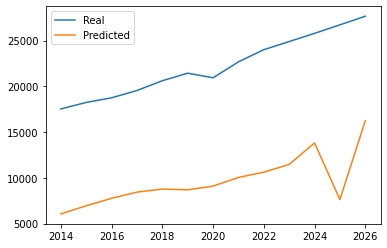

In [123]:
GDP.plot()